In [46]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import itertools

In [47]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Flatten,BatchNormalization
from keras.layers import Conv2D,MaxPool2D
from keras.models import Model, Sequential
from keras.layers import Dense, SimpleRNN, LSTM, Conv2D, MaxPooling2D, Dropout, Activation, Flatten, Bidirectional
from keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img
from sklearn.metrics import confusion_matrix

In [4]:
Facial_train='C:/Users/parva/7159CEM-Portfolio/FacialDataset/train'
Facial_test='C:/Users/parva/7159CEM-Portfolio/FacialDataset/test'

In [6]:
emotion_names= sorted(os.listdir(Facial_train))
emotion_names2= sorted(os.listdir(Facial_test))

In [20]:
batch_size = 64
target_size = (48,48)
Face_train_datagen = ImageDataGenerator(rescale=1./255)
Face_test_datagen   = ImageDataGenerator(rescale=1./255)
Face_train_generator = Face_train_datagen.flow_from_directory(
       Facial_train,
        target_size=target_size,
        batch_size=batch_size,
        color_mode="grayscale",
        class_mode='categorical',
        shuffle=True)
Face_test_generator = Face_test_datagen.flow_from_directory(
        Facial_test,
        target_size=target_size,
        batch_size=batch_size,
        color_mode="grayscale",
        class_mode='categorical')

Found 28703 images belonging to 7 classes.
Found 7177 images belonging to 7 classes.


In [9]:
#Data Preparation
input_shape = (48,48,1) # img_rows, img_colums, color_channels
number_of_classes = 7

In [10]:
print(os.listdir('C:/Users/parva/7159CEM-Portfolio/FacialDataset/train')) # Displaying Classes in Train Dataset (path given)

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


In [11]:
#Dividing all data class variable

def plot_images(image_directory, top=10):
    Total_picture_directoris = os.listdir(image_directory)
    picture_files = [os.path.join(image_directory, file) for file in Total_picture_directoris][:5]
  
    plt.figure(figsize=(12, 12))
  
    for idx, image_path in enumerate(picture_files):
        plt.subplot(5, 5, idx+1)
        img = plt.imread(image_path)
        plt.tight_layout()         
        plt.imshow(img, cmap='plasma')

In [22]:
#Data Visualisation
expressions = os.listdir('C:/Users/parva/7159CEM-Portfolio/FacialDataset/train')
for emotion in expressions:
    count = len(os.listdir(f'C:/Users/parva/7159CEM-Portfolio/FacialDataset/train/{emotion}'))
    print(f'{emotion} faces={count}')

angry faces=3989
disgust faces=436
fear faces=4097
happy faces=7215
neutral faces=4965
sad faces=4830
surprise faces=3171


In [23]:
expressions = os.listdir('C:/Users/parva/7159CEM-Portfolio/FacialDataset/test')
for emotion in expressions:
    count = len(os.listdir(f'C:/Users/parva/7159CEM-Portfolio/FacialDataset/test/{emotion}'))
    print(f'{emotion} faces={count}')

angry faces=957
disgust faces=111
fear faces=1024
happy faces=1774
neutral faces=1233
sad faces=1247
surprise faces=831


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


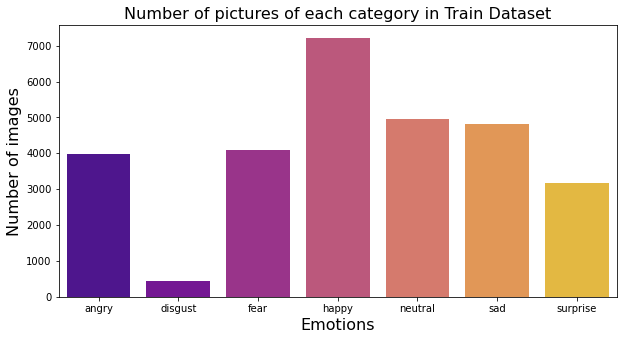

In [26]:
get_ipython().run_line_magic('matplotlib', 'inline')

expressions = os.listdir('C:/Users/parva/7159CEM-Portfolio/FacialDataset/train')
Label_values = [len(os.listdir(f'C:/Users/parva/7159CEM-Portfolio/FacialDataset/train/{emotion}')) for emotion in expressions]
fig = plt.figure(figsize = (10, 5))
sns.barplot(expressions, Label_values ,palette = 'plasma')
plt.xlabel("Emotions",fontsize = 16)
plt.ylabel("Number of images",fontsize = 16)
plt.title("Number of pictures of each category in Train Dataset", fontsize = 16)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


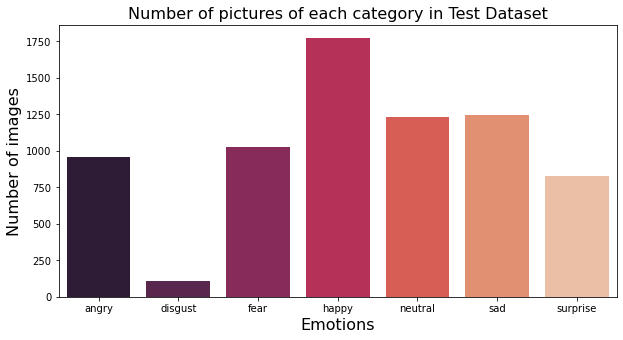

In [28]:
expressions = os.listdir('C:/Users/parva/7159CEM-Portfolio/FacialDataset/test')
Label_values2  = [len(os.listdir(f'C:/Users/parva/7159CEM-Portfolio/FacialDataset/test/{emotion}')) for emotion in expressions]
fig = plt.figure(figsize = (10, 5))

# creating the bar plot
sns.barplot(expressions, Label_values2 ,palette = 'rocket')
plt.xlabel("Emotions",fontsize = 16)
plt.ylabel("Number of images",fontsize = 16)
plt.title("Number of pictures of each category in Test Dataset", fontsize = 16)
plt.show()

Angry Pictures 



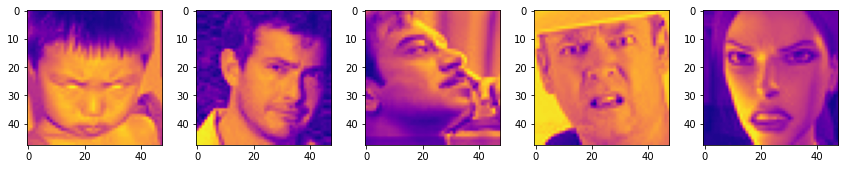

In [14]:
# Processed data from Training dataset
print('Angry Pictures ')
print()
plot_images(Facial_train+'/angry')

Disgusted Pictures 



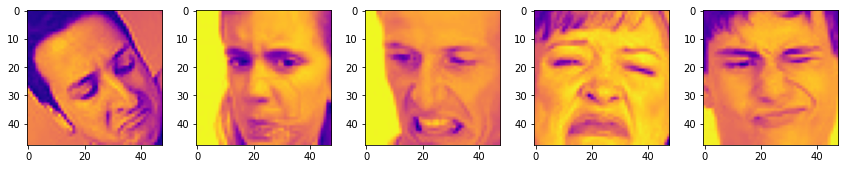

In [15]:
print('Disgusted Pictures ')
print()
plot_images(Facial_train+'/disgust')

Fear Pictures



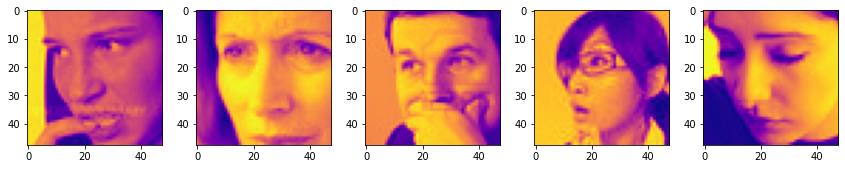

In [16]:
print('Fear Pictures')
plot_images(Facial_train+'/fear')
print()

Happy Pictures



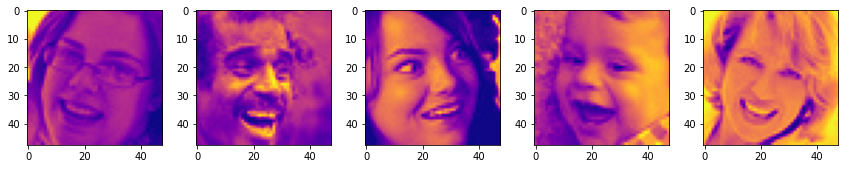

In [17]:
print('Happy Pictures')
plot_images(Facial_train+'/happy')
print()

Neutral Pictures



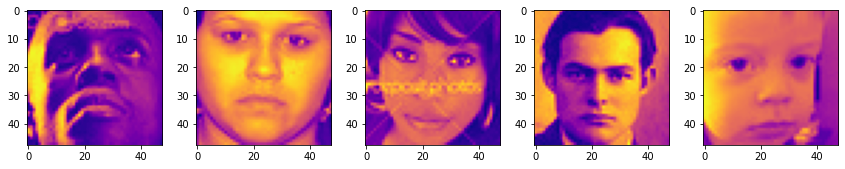

In [18]:
print('Neutral Pictures')
plot_images(Facial_train+'/neutral')
print()

Sad Pictures



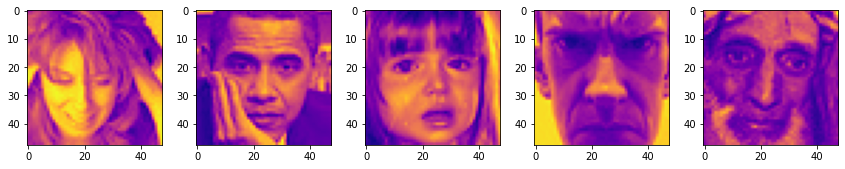

In [19]:
print('Sad Pictures')
plot_images(Facial_train+'/sad')
print()

Train and Test Surprised Pictures




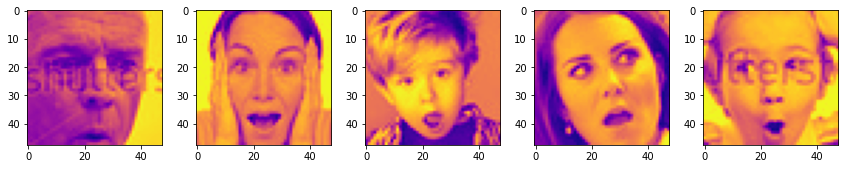

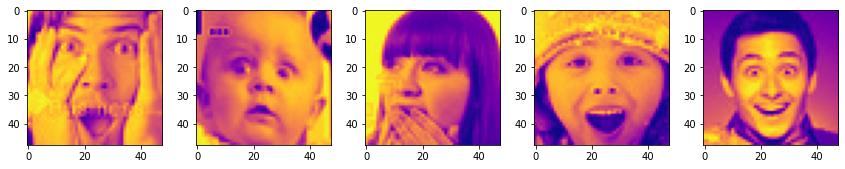

In [21]:
print('Train and Test Surprised Pictures')
plot_images(Facial_train+'/surprise')
print()
#print('Surprised Pictures')
plot_images(Facial_test+'/surprise')
print()

In [29]:
#Model Building
#CNN
model= tf.keras.models.Sequential()
model.add(Conv2D(32,(3, 3), padding='same', activation='relu', input_shape=(48, 48,1)))
model.add(Conv2D(64,(3,3), padding='same', activation='relu' ))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(128,(5,5), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
    
model.add(Conv2D(512,(3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(512,(3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten()) 
model.add(Dense(256,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
    
model.add(Dense(512,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))


model.add(Dense(7, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 64)        18496     
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 128)       2

In [30]:
Face_train_datagen = ImageDataGenerator(width_shift_range = 0.1,
                                         height_shift_range = 0.1,
                                         horizontal_flip = True,
                                         rescale = 1./255,
                                         validation_split = 0.2
                                        )
Face_test_datagen = ImageDataGenerator(rescale = 1./255,
                                         validation_split = 0.2)
img_size=48

In [65]:
Face_train_generator = Face_train_datagen.flow_from_directory(directory = Facial_train,
                                                    target_size = (img_size,img_size),
                                                    batch_size = 64,
                                                    color_mode = "grayscale",
                                                    class_mode = "categorical",
                                                    subset = "training"
                                                   )
Face_test_generator = Face_test_datagen.flow_from_directory( directory = Facial_test,
                                                              target_size = (img_size,img_size),
                                                              batch_size = 64,
                                                              color_mode = "grayscale",
                                                              class_mode = "categorical",
                                                              subset = "validation"
                                                             )

Found 22964 images belonging to 7 classes.
Found 1432 images belonging to 7 classes.


In [34]:
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax
model.compile(
    optimizer = Adam(lr=0.001), 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
  )

In [71]:
epochs = 20
batch_size = 64

In [ ]:
history = model.fit(x = Face_train_generator,epochs = epochs,validation_data = Face_test_generator)

Epoch 1/20
359/359 [==============================] - 409s 1s/step - loss: 1.2778 - accuracy: 0.5114 - val_loss: 1.2379 - val_accuracy: 0.5335
Epoch 2/20
359/359 [==============================] - 398s 1s/step - loss: 1.2604 - accuracy: 0.5237 - val_loss: 1.1169 - val_accuracy: 0.5824
Epoch 3/20
359/359 [==============================] - 404s 1s/step - loss: 1.2461 - accuracy: 0.5250 - val_loss: 1.1288 - val_accuracy: 0.5747
Epoch 4/20
162/359 [============>.................] - ETA: 3:24 - loss: 1.2307 - accuracy: 0.5324

In [38]:
cnn_score = model.evaluate_generator(Face_test_generator) 
print('Test loss: ', cnn_score[0])
print('Test accuracy: ', cnn_score[1]*100)

C:\Users\parva\AppData\Local\Temp/ipykernel_3560/1030871013.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  cnn_score = model.evaluate_generator(Face_test_generator)


Test loss:  1.2017449140548706
Test accuracy:  55.86591958999634


In [68]:
y_pred = model.predict(Face_test_generator)
Face_test_generator
y_pred

23/23 [==============================] - 3s 138ms/step


array([[3.41112882e-01, 3.94078484e-03, 9.27329585e-02, ...,
        1.00012913e-01, 2.40412250e-01, 1.61024202e-02],
       [9.40229520e-02, 1.57551502e-03, 1.57223970e-01, ...,
        1.99537218e-01, 5.00657082e-01, 1.26188090e-02],
       [4.46544997e-02, 3.09041090e-04, 6.44919127e-02, ...,
        6.58473670e-01, 2.12514669e-01, 1.78961232e-02],
       ...,
       [5.89645691e-02, 1.85752334e-03, 1.43239677e-01, ...,
        1.00331955e-01, 6.93193614e-01, 1.60987303e-03],
       [7.63252378e-04, 1.84330584e-05, 1.61323303e-04, ...,
        2.44365865e-03, 2.18174275e-04, 1.68325892e-03],
       [9.16701332e-02, 4.51626955e-03, 2.53929317e-01, ...,
        1.95290327e-01, 3.72677028e-01, 6.17353246e-02]], dtype=float32)

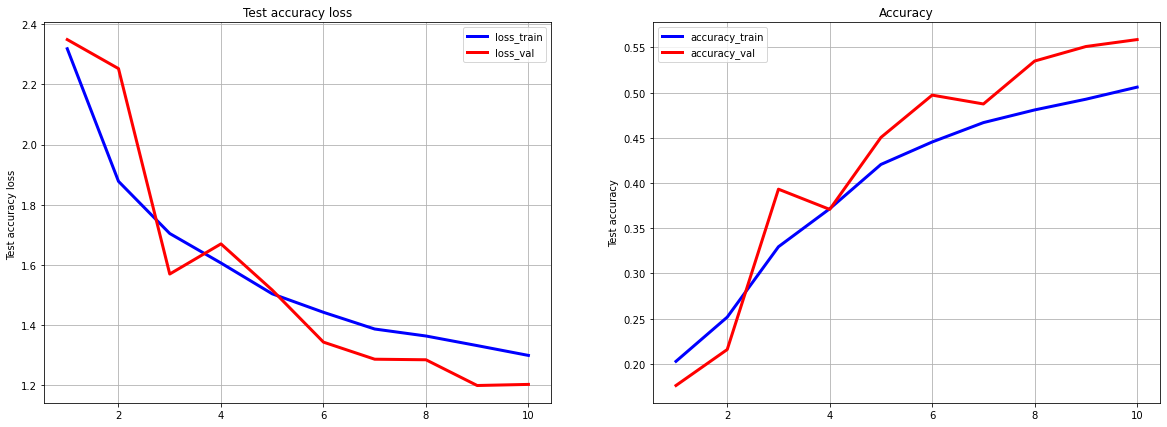

In [40]:
figure, axs = plt.subplots(1, 2, figsize=(20, 7))
plt.subplot(1, 2, 1)
axs = axs.ravel()
loss = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1, len(loss)+1)
axs[0].plot(epochs, loss, 'b', label='loss_train',linewidth=3)
axs[0].plot(epochs, loss_val, 'r', label='loss_val',linewidth=3)
axs[0].set_title('Test accuracy loss')

axs[0].set_ylabel('Test accuracy loss ')
axs[0].legend()
axs[0].grid()
acc = history.history['accuracy']
acc_val = history.history['val_accuracy']
axs[1].plot(epochs, acc, 'b', label='accuracy_train',linewidth=3)
axs[1].plot(epochs, acc_val, 'r', label='accuracy_val',linewidth=3)
axs[1].set_title('Accuracy')

axs[1].set_ylabel('Test accuracy')
axs[1].legend()
axs[1].grid()
plt.show()

In [70]:
#Confusion Matrix For CNN Model
y_true=Face_test_generator
cm = confusion_matrix(y_true,y_pred)
labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
title='Confusion matrix'
print(cm)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title(title)
plt.colorbar()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)
fmt = 'd'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

ValueError: Found input variables with inconsistent numbers of samples: [23, 1432]

In [41]:
model_classifier = Sequential()
model_classifier.add(Dense(128, input_shape=input_shape, activation='relu'))
model_classifier.add(Dropout(0.4))
model_classifier.add(Dense(64, activation='relu'))
model_classifier.add(Dropout(0.6))
model_classifier.add(Flatten())
model_classifier.add(Dense(7, activation='softmax'))
model_classifier.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 48, 48, 128)       256       
                                                                 
 dropout_6 (Dropout)         (None, 48, 48, 128)       0         
                                                                 
 dense_4 (Dense)             (None, 48, 48, 64)        8256      
                                                                 
 dropout_7 (Dropout)         (None, 48, 48, 64)        0         
                                                                 
 flatten_1 (Flatten)         (None, 147456)            0         
                                                                 
 dense_5 (Dense)             (None, 7)                 1032199   
                                                                 
Total params: 1,040,711
Trainable params: 1,040,711
No

In [42]:
model_classifier.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [43]:
num_epochs = 10

x_train = Face_train_generator.n//Face_train_generator.batch_size
y_test   = Face_test_generator.n//Face_test_generator.batch_size

In [44]:
model_classifier.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [45]:
history = model_classifier.fit(x=Face_train_generator, steps_per_epoch=x_train, epochs=num_epochs, batch_size=batch_size, validation_data=Face_test_generator, validation_steps=y_test)
history

Epoch 1/10
358/358 [==============================] - 159s 444ms/step - loss: 0.3900 - accuracy: 0.2610 - val_loss: 0.4447 - val_accuracy: 0.3253
Epoch 2/10
358/358 [==============================] - 161s 449ms/step - loss: 0.3767 - accuracy: 0.2902 - val_loss: 0.4126 - val_accuracy: 0.3310
Epoch 3/10
358/358 [==============================] - 153s 428ms/step - loss: 0.3749 - accuracy: 0.3013 - val_loss: 0.4113 - val_accuracy: 0.3430
Epoch 4/10
358/358 [==============================] - 156s 436ms/step - loss: 0.3733 - accuracy: 0.3084 - val_loss: 0.3909 - val_accuracy: 0.3452
Epoch 5/10
358/358 [==============================] - 157s 438ms/step - loss: 0.3726 - accuracy: 0.3112 - val_loss: 0.3995 - val_accuracy: 0.3487
Epoch 6/10
358/358 [==============================] - 161s 449ms/step - loss: 0.3729 - accuracy: 0.3081 - val_loss: 0.3945 - val_accuracy: 0.3672
Epoch 7/10
358/358 [==============================] - 164s 459ms/step - loss: 0.3714 - accuracy: 0.3107 - val_loss: 0.3909 -

In [56]:
ANN_score = model_classifier.evaluate_generator(Face_test_generator) 
print('Test loss: ', ANN_score[0])
print('Test accuracy: ', ANN_score[1]*100)

C:\Users\parva\AppData\Local\Temp/ipykernel_3560/2617014455.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  ANN_score = model_classifier.evaluate_generator(Face_test_generator)


Test loss:  0.3803025484085083
Test accuracy:  35.89385449886322


In [58]:
num_epochs = 10
x_train = Face_train_generator.n//Face_train_generator.batch_size
y_test   = Face_test_generator.n//Face_test_generator.batch_size

In [59]:
model_LSTM = Sequential()
model_LSTM.add(LSTM(256,return_sequences=True, input_shape=(4,189)))
model_LSTM.add(Dropout(0.2))

model_LSTM.add(LSTM(128, return_sequences=True))
model_LSTM.add(Dropout(0.2))

model_LSTM.add(LSTM(64, return_sequences=True))
model_LSTM.add(Dropout(0.2))

model_LSTM.add(LSTM(64))
model_LSTM.add(Dropout(0.2))

model_LSTM.add(Dense(units=1))

model_LSTM.add(Dense(10, activation='softmax'))
model_LSTM.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_LSTM.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 4, 256)            456704    
                                                                 
 dropout_8 (Dropout)         (None, 4, 256)            0         
                                                                 
 lstm_1 (LSTM)               (None, 4, 128)            197120    
                                                                 
 dropout_9 (Dropout)         (None, 4, 128)            0         
                                                                 
 lstm_2 (LSTM)               (None, 4, 64)             49408     
                                                                 
 dropout_10 (Dropout)        (None, 4, 64)             0         
                                                                 
 lstm_3 (LSTM)               (None, 64)               

In [60]:
history = model_LSTM.fit(x=Face_train_generator,steps_per_epoch=x_train, epochs=num_epochs, batch_size=batch_size, validation_data=Face_test_generator,validation_steps=y_test)
history

Epoch 1/10


ValueError: in user code:

    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\input_spec.py", line 232, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_2" "                 f"(type Sequential).
    
    Input 0 of layer "lstm" is incompatible with the layer: expected ndim=3, found ndim=4. Full shape received: (None, None, None, None)
    
    Call arguments received by layer "sequential_2" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(None, None, None, None), dtype=float32)
      • training=True
      • mask=None


In [61]:
Score = model_ann.evaluate_generator(Face_test_generator) 
print('Test loss: ', Score[0])
print('Test accuracy: ', Score[1]*100)

NameError: name 'model_ann' is not defined

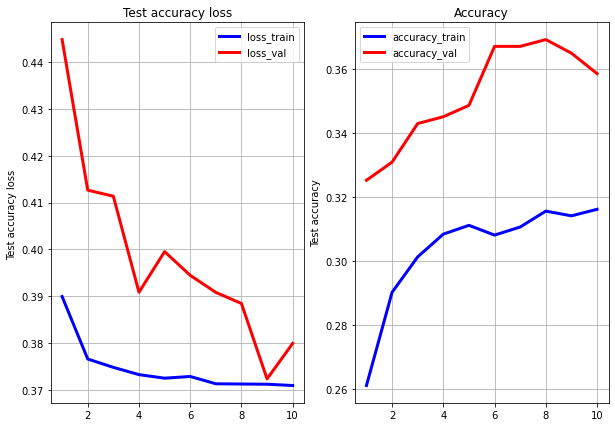

In [62]:
figure, axs = plt.subplots(1, 2, figsize=(10, 7))
plt.subplot(1, 2, 1)
axs = axs.ravel()
loss = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1, len(loss)+1)
axs[0].plot(epochs, loss, 'b', label='loss_train',linewidth=3)
axs[0].plot(epochs, loss_val, 'r', label='loss_val',linewidth=3)
axs[0].set_title('Test accuracy loss')

axs[0].set_ylabel('Test accuracy loss ')
axs[0].legend()
axs[0].grid()
acc = history.history['accuracy']
acc_val = history.history['val_accuracy']
axs[1].plot(epochs, acc, 'b', label='accuracy_train',linewidth=3)
axs[1].plot(epochs, acc_val, 'r', label='accuracy_val',linewidth=3)
axs[1].set_title('Accuracy')

axs[1].set_ylabel('Test accuracy')
axs[1].legend()
axs[1].grid()
plt.show()

In [63]:
numberof_pictures = 1
plt.figure(figsize=(19, 5))
for i in range(numberof_pictures):
    #ax = plt.subplot(1, numberof_pictures, i+1)
    plot_images(Facial_test+'/surprised')
    plot_images(Facial_train+'/surprised')
    #ax.get_xaxis().set_visible(False)
    #ax.get_yaxis().set_visible(False)

print()

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'C:/Users/parva/7159CEM-Portfolio/FacialDataset/test/surprised'

<Figure size 1368x360 with 0 Axes>